In [20]:
import numpy as np
from cluster_algorithms import base_kmeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.spatial import Voronoi, voronoi_plot_2d
import time

In [21]:
data_files_path = '../data_files/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97/'
file_name       = 'data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et0_eta0.npz'

plots_path      = '../clustering_plot/'
my_seed         = 13

In [22]:
jpsi_data = dict(np.load(data_files_path+file_name))
jpsi_data.keys()

dict_keys(['features', 'etBins', 'etaBins', 'etBinIdx', 'etaBinIdx', 'data', 'target'])

In [23]:
list_of_features = list(jpsi_data['features'])
print(list_of_features)

['avgmu', 'L2Calo_ring_0', 'L2Calo_ring_1', 'L2Calo_ring_2', 'L2Calo_ring_3', 'L2Calo_ring_4', 'L2Calo_ring_5', 'L2Calo_ring_6', 'L2Calo_ring_7', 'L2Calo_ring_8', 'L2Calo_ring_9', 'L2Calo_ring_10', 'L2Calo_ring_11', 'L2Calo_ring_12', 'L2Calo_ring_13', 'L2Calo_ring_14', 'L2Calo_ring_15', 'L2Calo_ring_16', 'L2Calo_ring_17', 'L2Calo_ring_18', 'L2Calo_ring_19', 'L2Calo_ring_20', 'L2Calo_ring_21', 'L2Calo_ring_22', 'L2Calo_ring_23', 'L2Calo_ring_24', 'L2Calo_ring_25', 'L2Calo_ring_26', 'L2Calo_ring_27', 'L2Calo_ring_28', 'L2Calo_ring_29', 'L2Calo_ring_30', 'L2Calo_ring_31', 'L2Calo_ring_32', 'L2Calo_ring_33', 'L2Calo_ring_34', 'L2Calo_ring_35', 'L2Calo_ring_36', 'L2Calo_ring_37', 'L2Calo_ring_38', 'L2Calo_ring_39', 'L2Calo_ring_40', 'L2Calo_ring_41', 'L2Calo_ring_42', 'L2Calo_ring_43', 'L2Calo_ring_44', 'L2Calo_ring_45', 'L2Calo_ring_46', 'L2Calo_ring_47', 'L2Calo_ring_48', 'L2Calo_ring_49', 'L2Calo_ring_50', 'L2Calo_ring_51', 'L2Calo_ring_52', 'L2Calo_ring_53', 'L2Calo_ring_54', 'L2Calo_ri

In [36]:
var_indexes = [list_of_features.index('avgmu'),
               list_of_features.index('L2Calo_et'),]

In [37]:
data_      = jpsi_data['data'][:, var_indexes]
my_filter  = (data_[:,0] <= 80)
sgn_filter = jpsi_data['target'][my_filter]==1
bkg_filter = jpsi_data['target'][my_filter]==0
data_      = data_[my_filter,:]
print(data_.shape)

(233397, 2)


In [38]:
sgn_choices_filter = np.random.choice(data_[sgn_filter].shape[0], size=400)
bkg_choices_filter = np.random.choice(data_[bkg_filter].shape[0], size=400)
choices_filter     = np.concatenate((sgn_choices_filter,bkg_choices_filter))

In [39]:
data_ = data_[choices_filter]
y     = jpsi_data['target'][choices_filter]
print(data_.shape)

(800, 2)


In [40]:
GeV = 1e3
epsilon = 1e-2

In [41]:
data_[:, 1] = data_[:, 1]/GeV
data_[data_[:,0] == 0, 0] = data_[data_[:,0] == 0, 0] + epsilon

In [42]:
kmeans = base_kmeans(n_clusters=5, seed=13)

In [57]:
%%time
kmeans.fit(data_, n_iter=50, tol=1e-5, breg_div='gen_kl')

Begin K-means using gen_kl divergence... 
Iteraction: 1
Iteraction: 2
Iteraction: 3
Iteraction: 4
Iteraction: 5
Iteraction: 6
Iteraction: 7
Iteraction: 8
Iteraction: 9
Iteraction: 10
Iteraction: 11
Iteraction: 12
Iteraction: 13
Iteraction: 14
Iteraction: 15
Iteraction: 16
Iteraction: 17
Iteraction: 18
Iteraction: 19
Iteraction: 20
Iteraction: 21
Iteraction: 22
Iteraction: 23
Iteraction: 24
Iteraction: 25
Iteraction: 26
Iteraction: 27
Iteraction: 28
Iteraction: 29
Iteraction: 30
Iteraction: 31
Iteraction: 32
Iteraction: 33
Iteraction: 34
Iteraction: 35
Iteraction: 36
Iteraction: 37
Iteraction: 38
Iteraction: 39
Iteraction: 40
Iteraction: 41
Iteraction: 42
Iteraction: 43
Iteraction: 44
Iteraction: 45
Iteraction: 46
Iteraction: 47
Iteraction: 48
Iteraction: 49
Iteraction: 50
CPU times: user 2.77 s, sys: 15.2 ms, total: 2.79 s
Wall time: 2.77 s


In [58]:
kmeans.get_sum_total_div()

array([1728.13043106,  391.76562401,  294.24104692,  246.53848889,
        210.74021743,  183.54012888,  161.64903265,  144.7528917 ,
        134.29210546,  127.10666668,  123.02035094,  121.20419356,
        119.70005872,  118.77108319,  118.09661954,  117.02734901,
        115.50578471,  114.57271691,  113.78772994,  113.26633914,
        112.91005667,  111.97455985,  110.98813792,  109.92274086,
        108.54125289,  107.09449227,  105.45007121,  104.00862063,
        103.03331445,  102.2954179 ,  101.99370208,  101.80158154,
        101.62342013,  101.53487968,  101.52499164,  101.49941735,
        101.47793963,  101.45066468,  101.43603434,  101.40416983,
        101.36676787,  101.33672877,  101.28663283,  101.22306428,
        101.17678164,  101.10544763,  101.02853027,  100.95486892,
        100.92591523,  100.91710464])

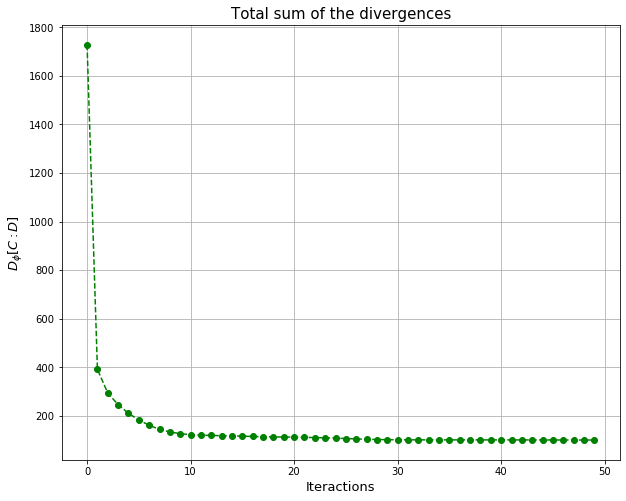

In [59]:
plt.figure(figsize=(10,8))
plt.plot(range(kmeans.get_last_iter()), kmeans.get_sum_total_div(), '--o', c='g')
plt.title('Total sum of the divergences', fontsize=15)
plt.ylabel(r'$D_{\phi}[C: D]$', fontsize=13)
plt.xlabel(r'Iteractions', fontsize=13)
plt.grid()
plt.show()

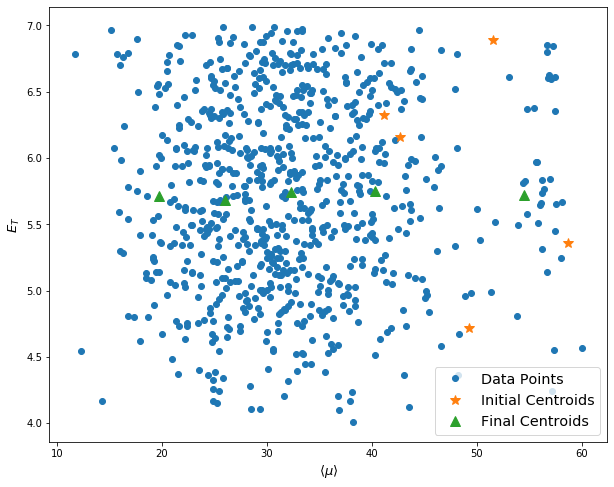

In [60]:
plt.figure(figsize=(10,8))
# Draw data using target to colorize them
plt.plot(data_[:,0], data_[:,1], 'o', label='Data Points')
plt.plot(kmeans.get_first_centroids()[:,0], kmeans.get_first_centroids()[:,1], '*',
         markersize=10, label='Initial Centroids')
plt.plot(kmeans.get_centroids()[:,0], kmeans.get_centroids()[:,1], '^',
         markersize=10, label='Final Centroids')
plt.legend(loc='best', fontsize='x-large')
plt.xlabel(r'$\langle\mu\rangle$', fontsize=13)
plt.ylabel(r'$E_T$', fontsize=13)
plt.show()

In [61]:
centers = kmeans.get_centroids()
# Get the Voronoi diagrams
vor = Voronoi(centers)

In [62]:
ax_lim = [np.min(data_, axis=0), np.max(data_, axis=0)]

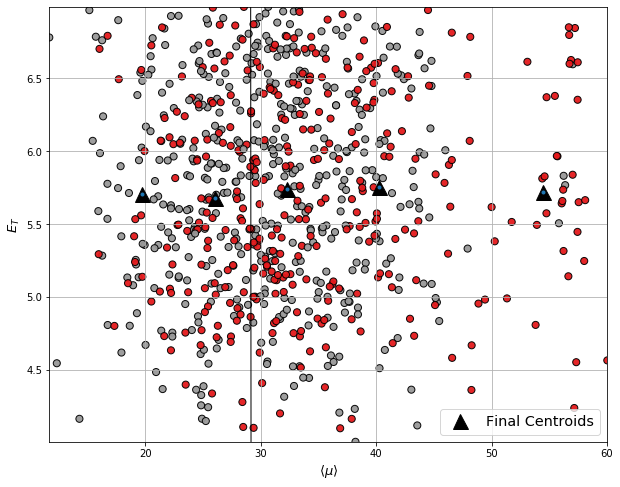

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
# Draw data using target to colorize them
axes.scatter(data_[:, 0], data_[:, 1], c=y, cmap='Set1',
             edgecolor='k', s=50, alpha=.95)
# Draw the centroids
axes.plot(centers[:,0], centers[:,1], '^', c='black', markersize=15, label='Final Centroids')
# Draw voronoi
voronoi_plot_2d(vor, ax=axes, show_vertices=True)
plt.grid()
plt.legend(loc='best', fontsize='x-large')
plt.xlim([ax_lim[0][0], ax_lim[1][0]])
plt.ylim([ax_lim[0][1], ax_lim[1][1]])
plt.xlabel(r'$\langle\mu\rangle$', fontsize=13)
plt.ylabel(r'$E_T$', fontsize=13)
plt.show()